# Logistic Regression
Logistic Regression is a method for analyzing a dataset in which there are one or more independent variables that determine an outcome. It is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). 

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a *binary classifier*.

Just like a Linear Regression model, a Logistic Regression model computes a
weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the *logistic* of this result,
## P = hθ(x)= σ(θT·X)
The logistic — also called the *logit*, noted σ(·) — is a *sigmoid function* (i.e., S-shaped) that outputs a number between 0 and 1,
![Logit](https://wikimedia.org/api/rest_v1/media/math/render/svg/5e648e1dd38ef843d57777cd34c67465bbca694f)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

#### Data Dictionary
Variable|Definition
------------ | -------------
Survived|Survival	
Pclass|Ticket class
Sex|Sex	
Age|Age in years	
SibSp|# of siblings / spouses aboard the Titanic	
Parch|# of parents / children aboard the Titanic	
Ticket|Ticket number	
Fare|Passenger fare	
Cabin|Cabin number	
Embarked|Port of Embarkation {C = Cherbourg, Q = Queenstown, S = Southampton}

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Lets see what we are missing
We will create a heatmap plot of the True/False values that we get from doing a `isnull()` check on the dataset.

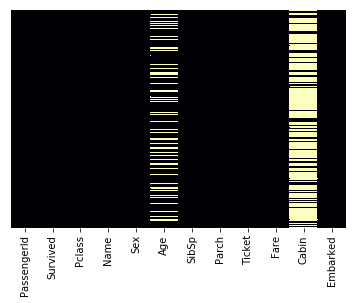

In [7]:
sns.heatmap(train.isnull(),cbar=False, cmap='magma',yticklabels=False)